<a href="https://colab.research.google.com/github/ThiwakornC/Spotter-NBA/blob/DavyJM/Spotter_NBAStats_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT Neccessary Libs

In [90]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display, Markdown, Latex, HTML, IFrame, JSON, Code, Image, YouTubeVideo, clear_output
import matplotlib.pyplot as plt
import seaborn as sns

Load and Clean Dataset

In [91]:
df_teamtotal0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Team%20Totals.csv")
df_teamsummary0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Team%20Summaries.csv")
df_playertotal0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Player%20Totals.csv")
df_playershoot0 = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Player%20Shooting.csv")
df_memo = pd.read_csv("https://raw.githubusercontent.com/ThiwakornC/Spotter-NBA/refs/heads/main/NBA%20Stats_Dataset/Memo.csv")
#df_playershoot0.info()

In [ ]:
df_teamtotal0.count()

In [50]:
#df_teamtotal0.isna()
#df_teamtotal0.query("@df_teamtotal0.isna().any(axis=1)", engine='python').reset_index(drop=True)

,season,lg,team,abbreviation,playoffs,g,mp,fg,fga,fg_percent,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,True,True,True,False,False
1841,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,True,True,True,False,False
1842,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,True,True,True,False,False
1843,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,True,True,True,False,False


In [92]:
threshold = len(df_teamtotal0) * 0.5  # Calculate the threshold for 50% NA values
threshold1 = len(df_teamsummary0) * 0.5
threshold2 = len(df_playertotal0) * 0.5
threshold3 = len(df_playershoot0) * 0.5
df_teamtotal = df_teamtotal0.dropna(thresh=threshold, axis=1)  # Drop columns
df_teamsummary = df_teamsummary0.dropna(thresh=threshold1, axis=1)
df_playertotal = df_playertotal0.dropna(thresh=threshold2, axis=1)
df_playershoot = df_playershoot0.dropna(thresh=threshold3, axis=1)

df_teamtotal = df_teamtotal[df_teamtotal['season'] > 1979]
df_teamsummary = df_teamsummary[df_teamsummary['season'] > 1979]
df_playertotal = df_playertotal[df_playertotal['season'] > 1979]
df_playershoot = df_playershoot[df_playershoot['season'] > 1979]

df_teamtotal = df_teamtotal[df_teamtotal['team'] != 'League Average']
df_teamsummary = df_teamsummary[df_teamsummary['team'] != 'League Average']
df_playertotal = df_playertotal[df_playertotal['tm'] != 'TOT']
df_playershoot = df_playershoot[df_playershoot['tm'] != 'TOT']

In [105]:
#df_playershoot.duplicated()
#display(df_playershoot.duplicated().value_counts())
df_teamsummary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1297
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            1254 non-null   int64  
 1   lg                1254 non-null   object 
 2   team              1254 non-null   object 
 3   abbreviation      1254 non-null   object 
 4   playoffs          1254 non-null   bool   
 5   age               1254 non-null   float64
 6   w                 1254 non-null   float64
 7   l                 1254 non-null   float64
 8   pw                1254 non-null   float64
 9   pl                1254 non-null   float64
 10  mov               1254 non-null   float64
 11  sos               1254 non-null   float64
 12  srs               1254 non-null   float64
 13  o_rtg             1254 non-null   float64
 14  d_rtg             1254 non-null   float64
 15  n_rtg             1254 non-null   float64
 16  pace              1254 non-null   float64
 17  

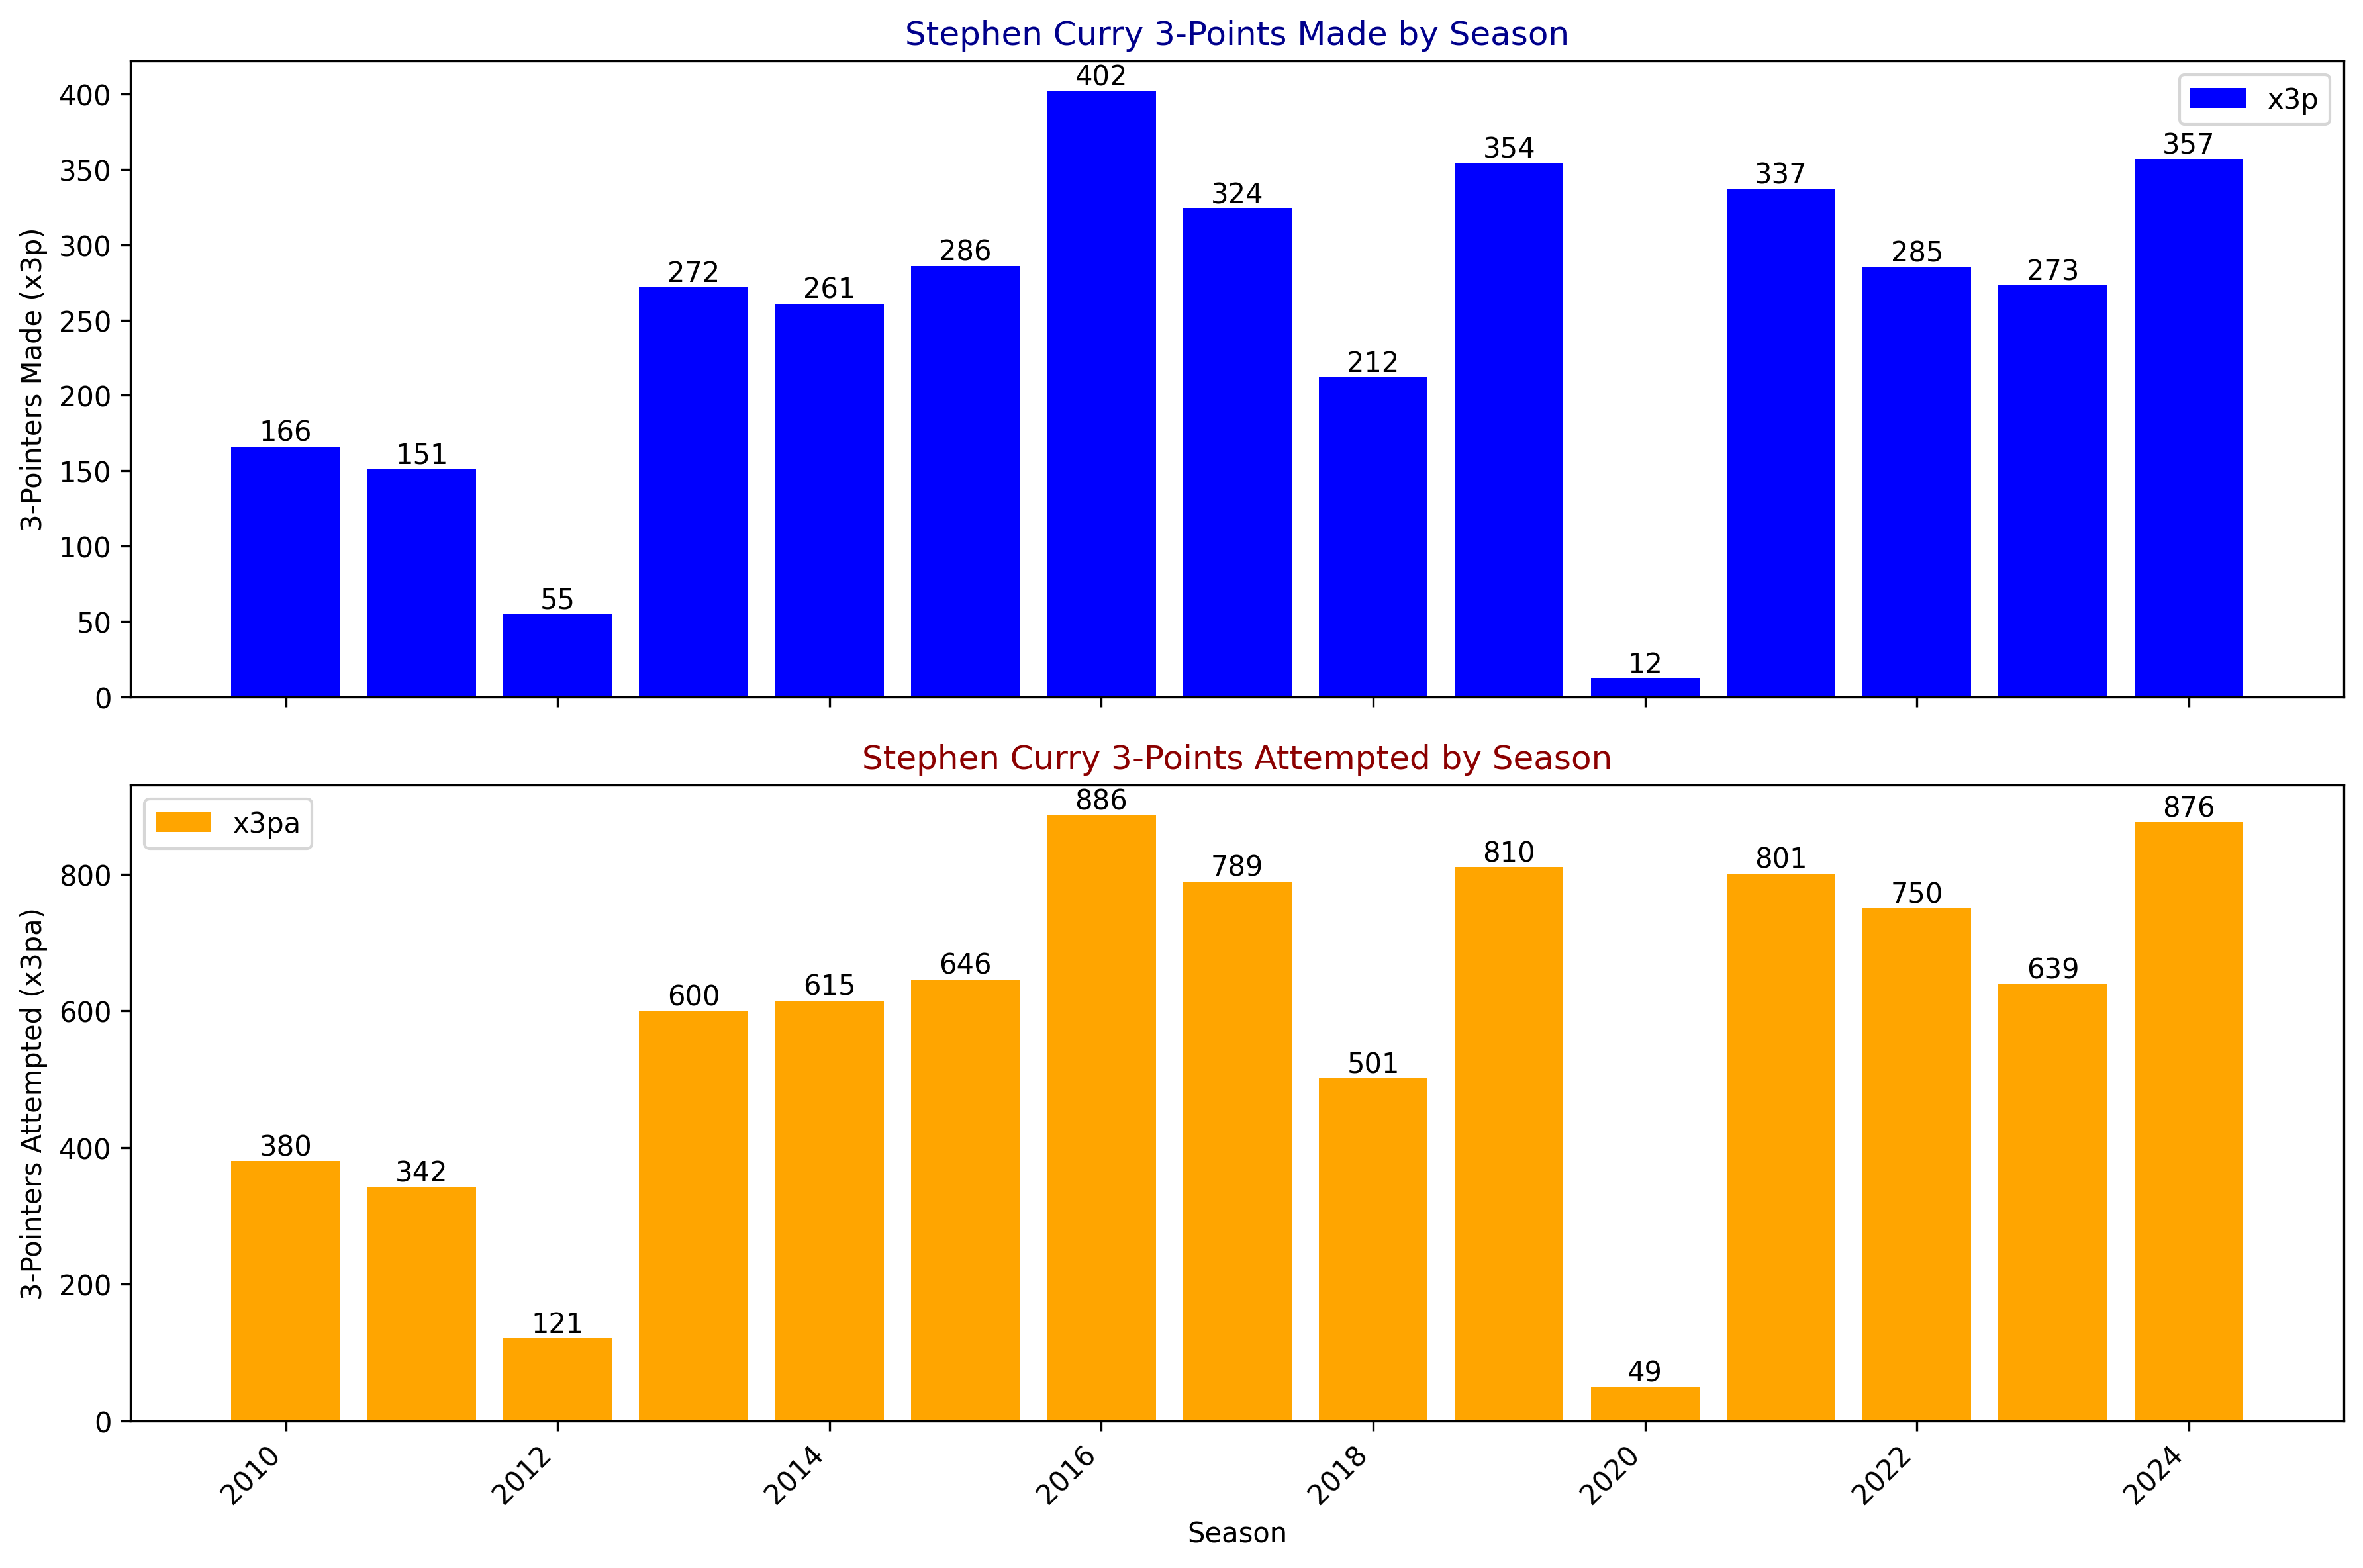

In [178]:
# Filter data for Stephen Curry
stephen_curry_data = df_playertotal[df_playertotal['player'] == 'Stephen Curry']

# Group data by season and calculate total x3p and x3pa
grouped_x3p = stephen_curry_data.groupby('season')['x3p'].sum()
grouped_x3pa = stephen_curry_data.groupby('season')['x3pa'].sum()

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, dpi=300)

# Plot x3p on axes1 with values on bars
bars1 = axes[0].bar(grouped_x3p.index, grouped_x3p.values, color='blue', label='x3p')
axes[0].set_ylabel('3-Pointers Made (x3p)')
axes[0].set_title('Stephen Curry 3-Points Made by Season', color='darkblue')
axes[0].legend()

# Add values on top of bars for x3p
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# Plot x3pa on axes2 with values on bars
bars2 = axes[1].bar(grouped_x3pa.index, grouped_x3pa.values, color='orange', label='x3pa')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('3-Pointers Attempted (x3pa)')
axes[1].set_title('Stephen Curry 3-Points Attempted by Season', color='darkred')
axes[1].legend()

# Add values on top of bars for x3pa
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

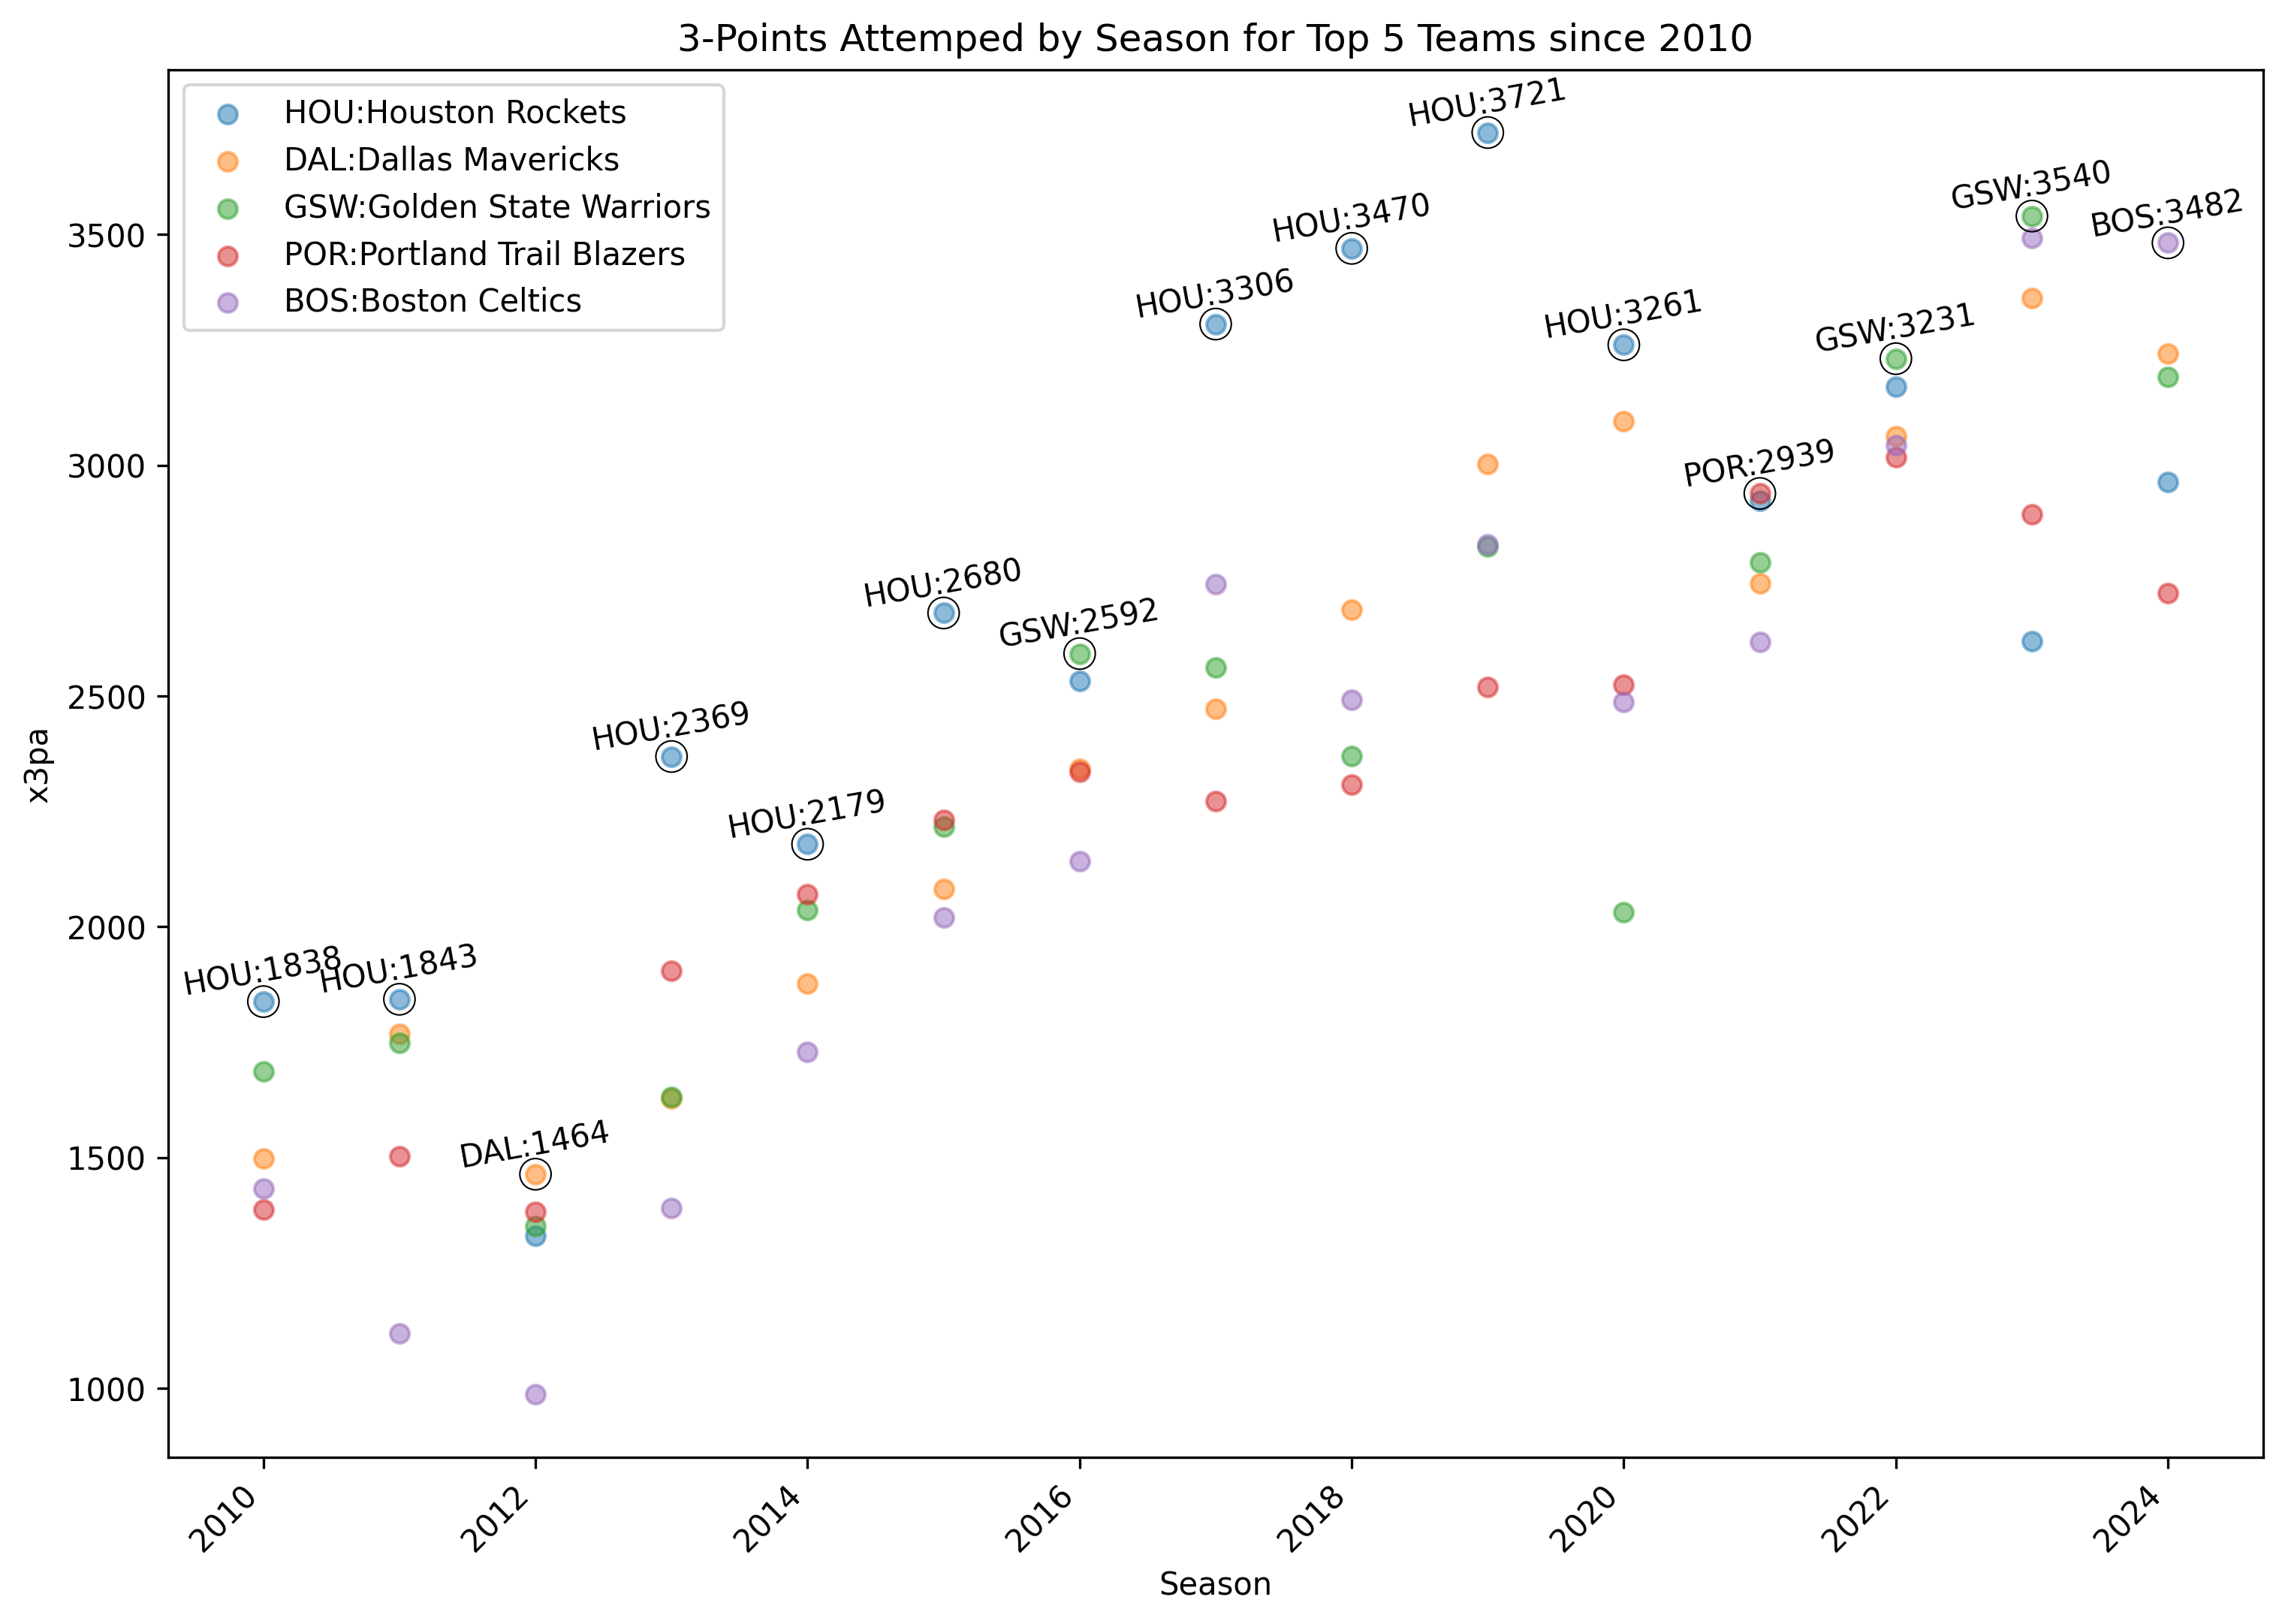

In [181]:
# Filter data for seasons since 2010
filtered_df = df_teamtotal[df_teamtotal['season'] >= 2010]

# Calculate the total x3pa for each team since 2010
team_total_x3pa = filtered_df.groupby('team')['x3pa'].sum().sort_values(ascending=False)

# Get the top 5 teams
top_5_teams = team_total_x3pa.head(5).index

# Filter the DataFrame for the top 5 teams
filtered_df = filtered_df[filtered_df['team'].isin(top_5_teams)]

# Find the highest x3pa for each season
highest_x3pa_each_season = filtered_df.loc[filtered_df.groupby('season')['x3pa'].idxmax()]

# Create a dictionary to map team names to abbreviations
team_abbreviations = dict(zip(df_teamtotal['team'], df_teamtotal['abbreviation']))

# Create the scatter plot
plt.figure(figsize=(12, 8), dpi=300)

# Create a dictionary to store legend handles and colors
legend_handles = {}

# Plot all points for top 5 teams with reduced opacity
for team in top_5_teams:
    team_data = filtered_df[filtered_df['team'] == team]
    abbreviation = team_abbreviations.get(team, team)  # Get the abbreviation for the team
    scatter = plt.scatter(team_data['season'], team_data['x3pa'], label=abbreviation, alpha=0.5)

    # Store the handle and color in the dictionary
    legend_handles[f"{abbreviation}:{team}"] = scatter


# Plot the highest x3pa points with border and x3pa:abbreviation
for index, row in highest_x3pa_each_season.iterrows():
    abbreviation = team_abbreviations.get(row['team'], row['team'])
    plt.scatter(row['season'], row['x3pa'], linewidths=0.5, s=100,
                edgecolors='black', facecolors='none')  # Highlight with black border
    text = f"{abbreviation}:{int(row['x3pa'])}"  # Format as x3pa:abbreviation
    plt.text(row['season'], row['x3pa'], text, ha='center', va='bottom', rotation=10)

# Add labels and title
plt.xlabel('Season')
plt.ylabel('x3pa')
plt.title('3-Points Attemped by Season for Top 5 Teams since 2010')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Create the legend with matching colors
legend_labels = list(legend_handles.keys())
handles = list(legend_handles.values())
plt.legend(handles, legend_labels, loc='best')  # Use stored handles and labels

# Show the plot
plt.show()